# Intro

## User Input

In [1]:
#libraries
import pandas as pd
import numpy as np

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from geopy.distance import great_circle

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import json # library to handle JSON files

import requests # library to handle requests
from requests import get

from bs4 import BeautifulSoup

import re

from time import sleep

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

import seaborn as sns

import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
from sklearn.cluster import KMeans

from ipywidgets import widgets
from IPython.display import display
from bs4 import BeautifulSoup as Soup, Tag
import requests # library to handle requests
from requests import get
from bs4 import BeautifulSoup
import re
from time import sleep

import matplotlib as plt
from matplotlib import pyplot

import matplotlib.pyplot as plt
%matplotlib inline 

In [101]:
#function to handle the button
def btn_eventhandler(obj):
    print('Search started in {}!'.format(slCity.value))
    print (slCity.value)

    
#User Input
#City
print("Select the City in Spain you want to search")
slCity = widgets.Dropdown( options=[('Barcelona', 'Barcelona'), ('Two', 2), ('Three', 3)],)
display(slCity)

#Rent or Buy
print("Do you want to rent or buy?")
slSellBuy = widgets.Dropdown(options = {'Rent','Buy'})
display(slSellBuy)

#Select Extra Option
print("--- Extra Option ---")
boParking = widgets.ToggleButton(description='Parking',button_style='success')
display(boParking)

boTerrace = widgets.ToggleButton(description='Terrace',button_style='success')
display(boTerrace)

boHeater = widgets.ToggleButton(description='Heaters',button_style='success')
display(boHeater)

boSwimming = widgets.ToggleButton(description='Swimming Pool',button_style='success')
display(boSwimming)

boGarden = widgets.ToggleButton(description='Garden',button_style='success')
display(boGarden)

boElevator = widgets.ToggleButton(description='Elevator',button_style='success')
display(boElevator)

boAir = widgets.ToggleButton(description='Air Condition',button_style='success')
display(boAir)

#Button Start
btn = widgets.Button(description='Start')
display(btn)    
btn.on_click(btn_eventhandler)

Select the City in Spain you want to search


Dropdown(options=(('Barcelona', 'Barcelona'), ('Two', 2), ('Three', 3)), value='Barcelona')

Do you want to rent or buy?


Dropdown(options=('Buy', 'Rent'), value='Buy')

--- Extra Option ---


ToggleButton(value=False, button_style='success', description='Parking')

ToggleButton(value=False, button_style='success', description='Terrace')

ToggleButton(value=False, button_style='success', description='Heaters')

ToggleButton(value=False, button_style='success', description='Swimming Pool')

ToggleButton(value=False, button_style='success', description='Garden')

ToggleButton(value=False, button_style='success', description='Elevator')

ToggleButton(value=False, button_style='success', description='Air Condition')

Button(description='Start', style=ButtonStyle())

Search started in Barcelona!
Barcelona
Search started in Barcelona!
Barcelona
Search started in Barcelona!
Barcelona
Search started in Barcelona!
Barcelona
Search started in Barcelona!
Barcelona
Search started in Barcelona!
Barcelona
Search started in Barcelona!
Barcelona
Search started in Barcelona!
Barcelona


In [122]:
#get Values
urlAction=''
if(slSellBuy.value!='Rent'):
    urlAction = 'venta'
else:
    urlAction = 'alquiler'

urlExtra = ''
if(boParking.value):
    urlExtra+='parking/'
if(boTerrace.value):
    urlExtra+='terraza/'
if(boHeater.value):
    urlExtra+='calefaccion/'    
if(boSwimming.value):
    urlExtra+='contrastero/'    
if(boGarden.value):
    urlExtra+='jardin/'
if(boElevator.value):
    urlExtra+='ascensor/'
if(boAir.value):
    urlExtra+='aireacondicionado/'    
    

In [123]:
url = 'https://www.pisos.com/{}/pisos-{}/{}'.format(urlAction,slCity.value.lower(),urlExtra)
print(url)

https://www.pisos.com/alquiler/pisos-barcelona/jardin/


In [139]:
url = 'https://www.pisos.com/{}/pisos-{}/{}'.format(urlAction,slCity.value.lower(),urlExtra)
print(url)
listing_found = True
page_num = 1
listings = []
    
while listing_found:
    
    # define header to make the request look like it's comming from an actual browser
    headers = {'User-agent': 'Googlebot'}

    url = url+'/{}'.format(page_num)
    
    # load the response
    response = get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # find all outer containers of listings
    apartment_containers = soup.find_all('div', class_="row-to-hide")
    
    # check if page contains listings
    if len(apartment_containers) == 0:
        break
    
   
    # for each apartment extract relevant data
    for apt in apartment_containers:
        
        price = longitude = latitude = lat= lon=  0
        location=''
        
        #price
        price = apt.find_all('div', class_="price")[0].contents[0].replace('€','').replace('.','').strip()
        if (price.isdigit()==False):
            price = 0
        
        #location
        if apt.find_all('div', class_="location"):
            location = apt.find_all('div', class_="location")[0].contents[0].strip()
        
        #latitude
        if apt.find("meta",  itemprop="latitude"):
            latitude = apt.find("meta",  itemprop="latitude")
            lat = latitude["content"].replace(",",".")
        else:
            lat = 0
       
        #longitude
        if apt.find("meta",  itemprop="longitude"):
            longitude = apt.find("meta",  itemprop="longitude")
            lon = longitude["content"].replace(",",".")
        else:
            lon = 0
        
        info = apt.find_all('div', class_="characteristics")
        for charateristic in info:
            size=rooms=priceM2=floor=bathrooms=''
        
            item = charateristic.find_all('div', class_="item")
            #print(item)
            for div in item:
                #size
                if "m²" in div.text and "€" not in div.text:
                    size = div.contents[0]

                #bedroom
                if div.find_all("span", {"class": "icon icoBed"}):
                    rooms = div.contents[0]
                    
                #bathroom
                if div.find_all("span", {"class": "icon icoBath"}):
                    bathrooms = div.text

                #price
                if "€" in div.text:
                    priceM2 = div.text

                #floor
                if "planta" in div.text:
                    floor = div.text
                
            size=size.replace('m²','').replace('.','').strip()
            rooms=rooms.strip()
            bathrooms=bathrooms.strip()
            priceM2=priceM2.replace('€/m²','').replace('.','').strip()
            floor=floor.replace('ª','').replace('planta','').strip()
            if size=='':
                size = 1
            if priceM2=='':
                priceM2=float(price)/float(size)
            if rooms=='':
                rooms = 1
            if bathrooms=='':
                bathrooms = 1
            if floor=='':
                floor = 0
        
        #save only if location specified  
        if location!='' or price==0:
            listings.append([location, int(size), int(rooms), int(bathrooms),  int(price),float(priceM2), int(floor),float(lon),float(lat)])
    
    # increase page number
    page_num += 1
    
    #debug only 1 line
    #listing_found = False
    
    #wait n (1 to 3) second
    #sleep(np.random.randint(1,3))

#print(listings)
#column
column_names = ['Location','Size','Rooms','Bathroom','Price','Price mSq', 'Floor', 'Longitude', 'Latitude']

#new dataframe
df = pd.DataFrame(listings, columns=column_names)

https://www.pisos.com/alquiler/pisos-barcelona/jardin/


In [140]:
print('There are {} apartments in the dataset'.format(df.shape[0]))

df.head()

There are 865 apartments in the dataset


,Location,Size,Rooms,Bathroom,Price,Price mSq,Floor,Longitude,Latitude
0,L'Eixample-Torreblanca (Sant Cugat del Vallès),109,4,2,1450,13.0,0,0.0,0.0
1,Cabrils,338,5,4,3650,10.0,0,0.0,0.0
2,Alella,500,6,4,6000,12.0,0,0.0,0.0
3,Can Mates-Volpelleres (Sant Cugat del Vallès),76,2,2,1350,17.0,1,0.0,0.0
4,La Pineda (Castelldefels),50,2,1,890,17.0,0,0.0,0.0


In [141]:
print('Descrive the dataset')
df.describe()

Descrive the dataset


,Size,Rooms,Bathroom,Price,Price mSq,Floor,Longitude,Latitude
count,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000
mean,222.388439,3.876301,2.643931,2349.914451,93.939884,0.736416,0.354671,7.038785
std,168.703016,1.541015,1.412711,1983.254260,547.275454,1.394393,0.789285,15.565275
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,98.000000,3.000000,2.000000,1105.000000,7.000000,0.000000,0.000000,0.000000
50%,179.000000,4.000000,2.000000,1500.000000,10.000000,0.000000,0.000000,0.000000
75%,311.000000,5.000000,3.000000,3000.000000,14.000000,1.000000,0.000000,0.000000
max,1135.000000,10.000000,11.000000,15000.000000,4100.000000,16.000000,2.711030,41.988500


In [142]:
print('Check the Datatype')
df.dtypes

Check the Datatype


Location      object
Size           int64
Rooms          int64
Bathroom       int64
Price          int64
Price mSq    float64
Floor          int64
Longitude    float64
Latitude     float64
dtype: object

# Clean Data

In [143]:
#here not so much to do, data cleaned during the import, double check if all Location are set
#Remove rows with NA
print('There are {} apartments in the dataset'.format(df.shape[0]))
df.dropna(subset=['Location'], inplace=True)
print('Now there are {} apartments in the dataset'.format(df.shape[0]))

There are 865 apartments in the dataset
Now there are 865 apartments in the dataset


## Standardize Data

In [144]:
print('Partition Data...')
groupValue = [1,2,3,4,5]


print('Partition Price')
binsPrice = np.linspace(min(df["Price"]), max(df["Price"]), 6)
groupPrice = ['Very Low','Low', 'Medium', 'High','Very High']
df['Price-binned'] = pd.cut(df['Price'], binsPrice, labels=groupPrice, include_lowest=True )
df['Price-value'] = pd.cut(df['Price'], binsPrice, labels=groupValue, include_lowest=True )


print('Partition Rooms')
binsRooms = np.linspace(min(df["Rooms"]), max(df["Rooms"]), 6)
groupRooms = ['Very Few','Few', 'Normal', 'Many','A Lot']
df['Rooms-binned'] = pd.cut(df['Rooms'], binsRooms, labels=groupRooms, include_lowest=True )


print('Partition Size')
binsSize = np.linspace(min(df["Size"]), max(df["Size"]), 6)
groupSize = ['Very Small','Small', 'Avarage', 'Big','Very Big']
df['Size-binned'] = pd.cut(df['Size'], binsSize, labels=groupSize, include_lowest=True )
df['Size-value'] = pd.cut(df['Size'], binsSize, labels=groupValue, include_lowest=True )


#Values Counts
df.head()



Partition Data...
Partition Price
Partition Rooms
Partition Size


,Location,Size,Rooms,Bathroom,Price,Price mSq,Floor,Longitude,Latitude,Price-binned,Price-value,Rooms-binned,Size-binned,Size-value
0,L'Eixample-Torreblanca (Sant Cugat del Vallès),109,4,2,1450,13.0,0,0.0,0.0,Very Low,1,Few,Very Small,1
1,Cabrils,338,5,4,3650,10.0,0,0.0,0.0,Low,2,Normal,Small,2
2,Alella,500,6,4,6000,12.0,0,0.0,0.0,Low,2,Normal,Avarage,3
3,Can Mates-Volpelleres (Sant Cugat del Vallès),76,2,2,1350,17.0,1,0.0,0.0,Very Low,1,Very Few,Very Small,1
4,La Pineda (Castelldefels),50,2,1,890,17.0,0,0.0,0.0,Very Low,1,Very Few,Very Small,1


Histogram Price Bins


Text(0.5, 1.0, 'Size bins')

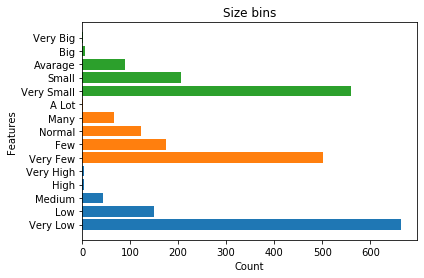

In [145]:
print('Histogram Price Bins')
pyplot.barh(groupPrice, df["Price-binned"].value_counts())
pyplot.barh(groupRooms, df["Rooms-binned"].value_counts())
pyplot.barh(groupSize, df["Size-binned"].value_counts())
# set x/y labels and plot title
pyplot.xlabel("Count")
pyplot.ylabel("Features")
pyplot.title("Size bins")


Linear relationship between Size and the Price


(0, 15750.016694260485)

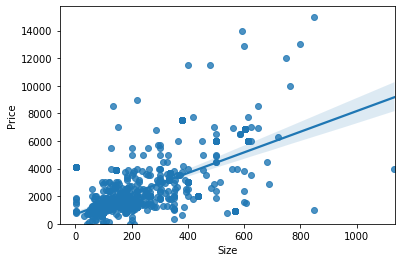

In [146]:
print('Linear relationship between Size and the Price')
# Engine size as potential predictor variable of price
sns.regplot(x="Size", y="Price", data=df)
plt.ylim(0,)

In [147]:
print('Linear relationship Value between Size and the Price')
df[["Size", "Price"]].corr()

Linear relationship Value between Size and the Price


,Size,Price
Size,1.000000,0.635624
Price,0.635624,1.000000


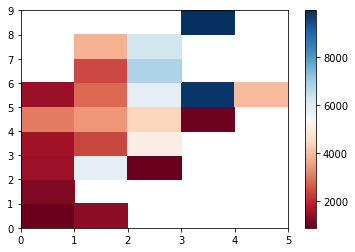

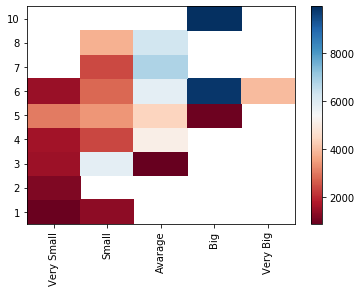

In [148]:
# grouping results
df_gptest = df[['Rooms','Size-binned','Price']]
grouped_test1 = df_gptest.groupby(['Rooms','Size-binned'],as_index=False).mean()
grouped_test1

grouped_pivot = grouped_test1.pivot(index='Rooms',columns='Size-binned')
grouped_pivot

df_gptest2 = df[['Size-binned','Price']]
grouped_test_bodystyle = df_gptest2.groupby(['Size-binned'],as_index= False).mean()
grouped_test_bodystyle

#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

# STUDY DATA

Plot


[Text(0, 0, 'Very Low'),
 Text(0, 0, 'Low'),
 Text(0, 0, 'Medium'),
 Text(0, 0, 'High'),
 Text(0, 0, 'Very High')]

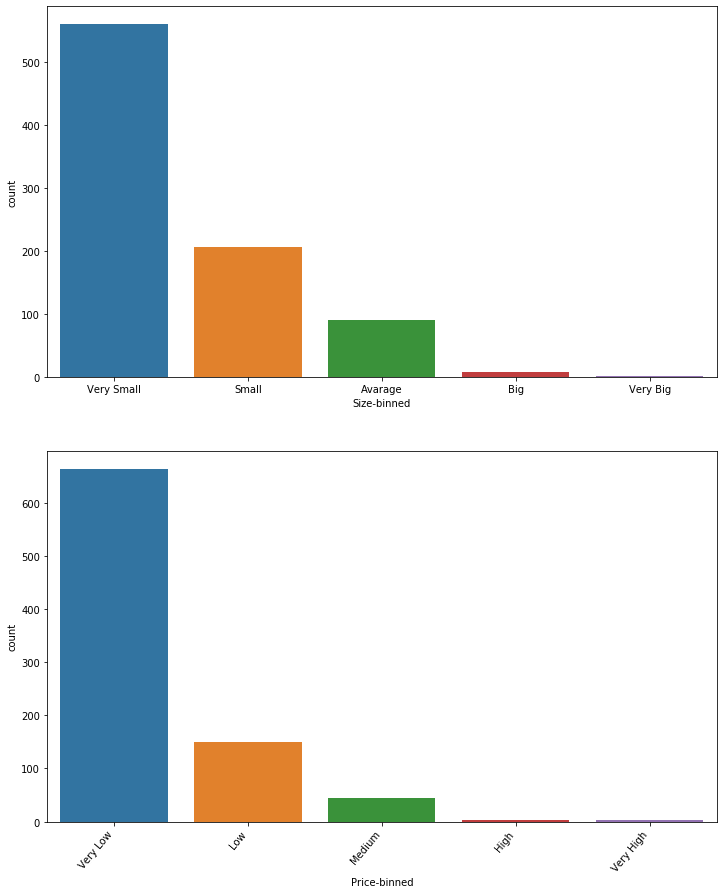

In [149]:
print('Plot')

fig, ax =plt.subplots(2,1, figsize=(12,15))
sns.countplot(df['Price-binned'], ax=ax[1])
sns.countplot(df['Size-binned'], ax=ax[0])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=50, ha="right")



## Plot the price and check for any outliers

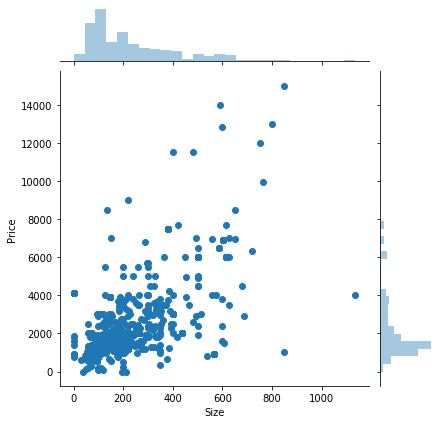

In [150]:
sns.jointplot(x='Size', y='Price', data=df[['Size','Price']])

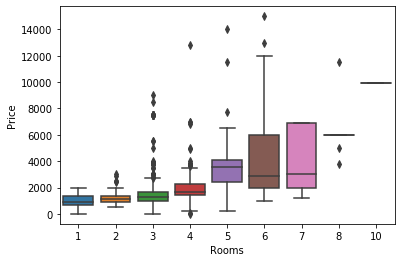

In [151]:
sns.boxplot(x='Rooms', y='Price', data=df)

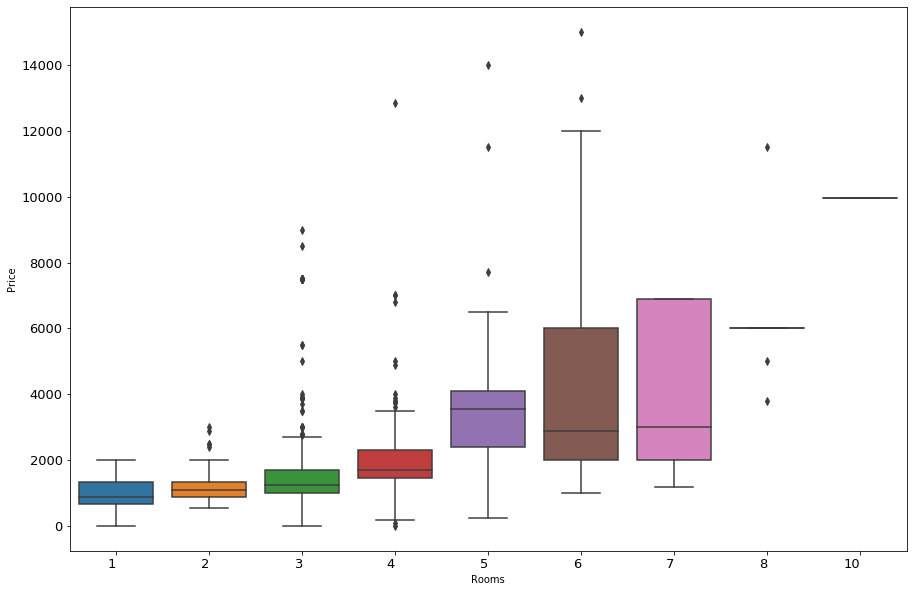

In [152]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x='Rooms', y='Price', data=df)
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
ax.tick_params(labelsize=13)

Text(0.5, 1.0, 'Rooms for Price')

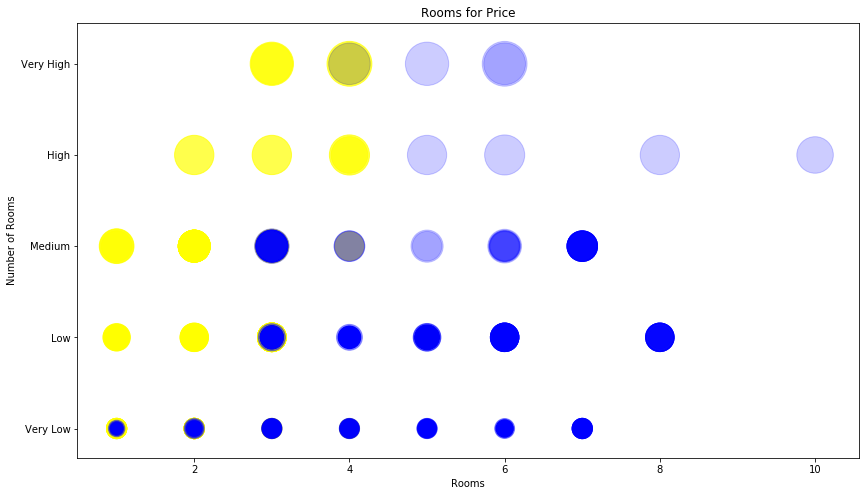

In [153]:
# normalize Brazil data
norm_Price = (df['Price'] - df['Price'].min()) / (df['Price'].max() - df['Price'].min())

# Brazil
ax0 = df.plot(kind='scatter',
                    x='Size-value',
                    y='Price-binned',
                    figsize=(14, 8),
                    alpha=0.7,                  # transparency
                    color='yellow',
                    s=norm_Price * 2000 + 10,  # pass in weights 
                   )
# Argentina
ax1 = df.plot(kind='scatter',
                    x='Rooms',
                    y='Price-binned',
                    alpha=0.2,
                    color="blue",
                    s=norm_Price * 2000 + 10,
                    ax = ax0
                   )
ax0.set_ylabel('Number of Rooms')
ax0.set_title('Rooms for Price')


In [154]:
#Visualize crime data
groupby_df = df.groupby(["Location"], as_index=True).count()
groupby_df.sort_values(['Location'], ascending=False, axis=0, inplace=True)
groupby_df.head(20)


,Size,Rooms,Bathroom,Price,Price mSq,Floor,Longitude,Latitude,Price-binned,Price-value,Rooms-binned,Size-binned,Size-value
Location,,,,,,,,,,,,,
Ègara (Distrito Sant Pere Nord-Ègara. Terrassa),1,1,1,1,1,1,1,1,1,1,1,1,1
Zona Universitària-Gran Via Mar-Camí Ral (Castelldefels),3,3,3,3,3,3,3,3,3,3,3,3,3
Vista Alegre-Can Vinader (Castelldefels),1,1,1,1,1,1,1,1,1,1,1,1,1
Vilassar de Dalt,3,3,3,3,3,3,3,3,3,3,3,3,3
Vilanova del Vallès,1,1,1,1,1,1,1,1,1,1,1,1,1
Viladecavalls,1,1,1,1,1,1,1,1,1,1,1,1,1
Via Europa (Mataró),1,1,1,1,1,1,1,1,1,1,1,1,1
Verdun (Distrito Nou Barris. Barcelona Capital),1,1,1,1,1,1,1,1,1,1,1,1,1
Vallvidrera-El Tibidabo-Les Planes (Distrito Sarrià-Sant Gervasi. Barcelona Capital),2,2,2,2,2,2,2,2,2,2,2,2,2


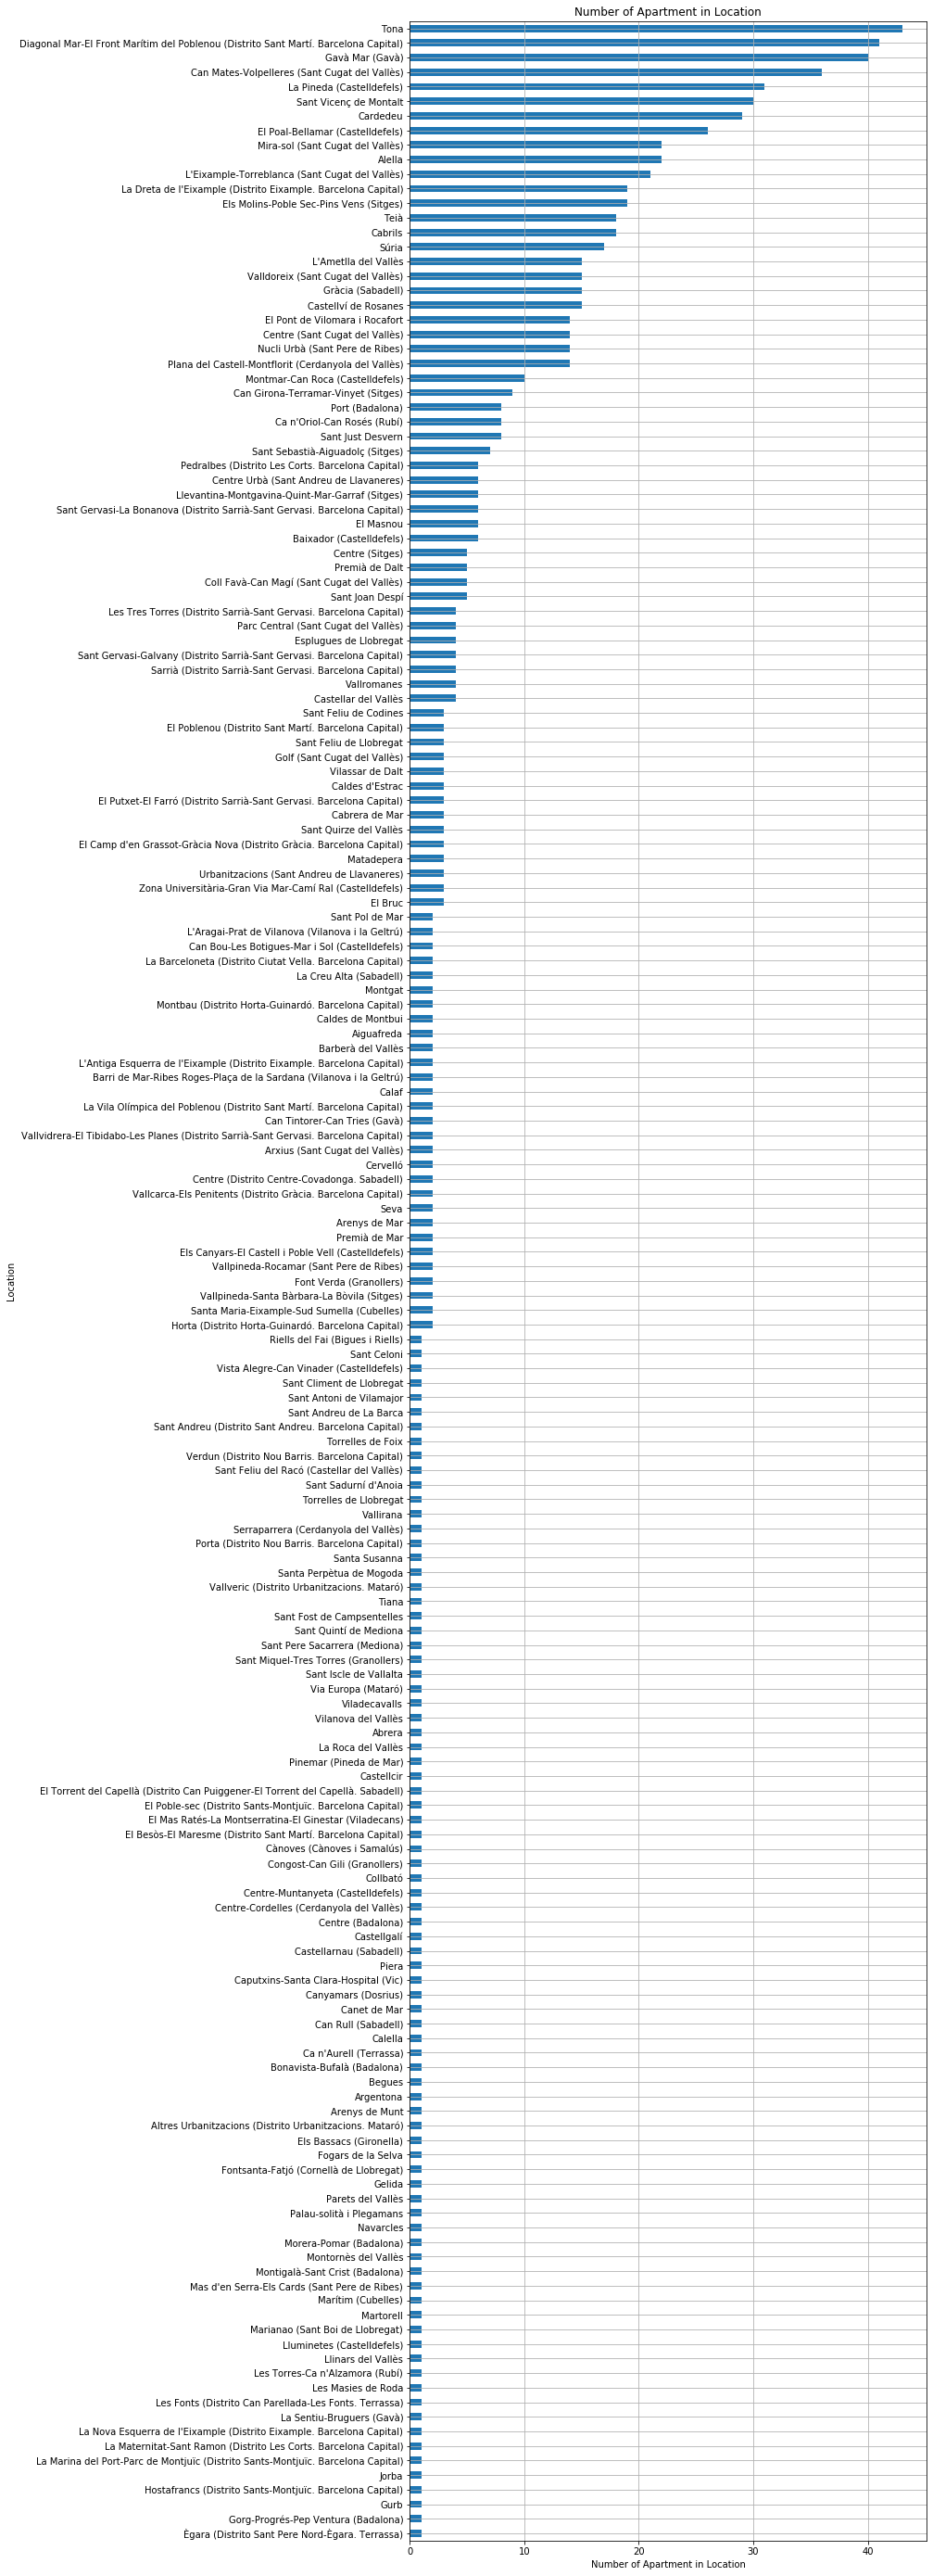

In [159]:
groupby_df['Rooms'].sort_values().plot(kind='barh', grid=True, figsize=(10,50))
plt.xlabel('Number of Apartment in Location')
plt.title('Number of Apartment in Location')
plt.show()

In [157]:
groupby_df.head()

,Size,Rooms,Bathroom,Price,Price mSq,Floor,Longitude,Latitude,Price-binned,Price-value,Rooms-binned,Size-binned,Size-value
Location,,,,,,,,,,,,,
Ègara (Distrito Sant Pere Nord-Ègara. Terrassa),1,1,1,1,1,1,1,1,1,1,1,1,1
Zona Universitària-Gran Via Mar-Camí Ral (Castelldefels),3,3,3,3,3,3,3,3,3,3,3,3,3
Vista Alegre-Can Vinader (Castelldefels),1,1,1,1,1,1,1,1,1,1,1,1,1
Vilassar de Dalt,3,3,3,3,3,3,3,3,3,3,3,3,3
Vilanova del Vallès,1,1,1,1,1,1,1,1,1,1,1,1,1


In [172]:
x = df['Rooms']    
y = df['Price']    
fit = np.polyfit(x, y, deg=1)

fit

array([ 673.24543041, -259.78720019])

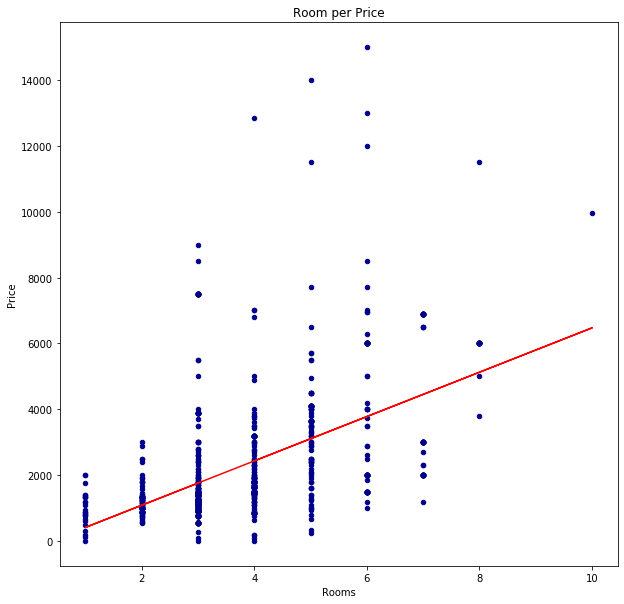

In [173]:
df.plot(kind='scatter', x='Rooms', y='Price', figsize=(10, 10), color='darkblue')

plt.title('Room per Price')
plt.xlabel('Rooms')
plt.ylabel('Price')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(0, 0))

plt.show()

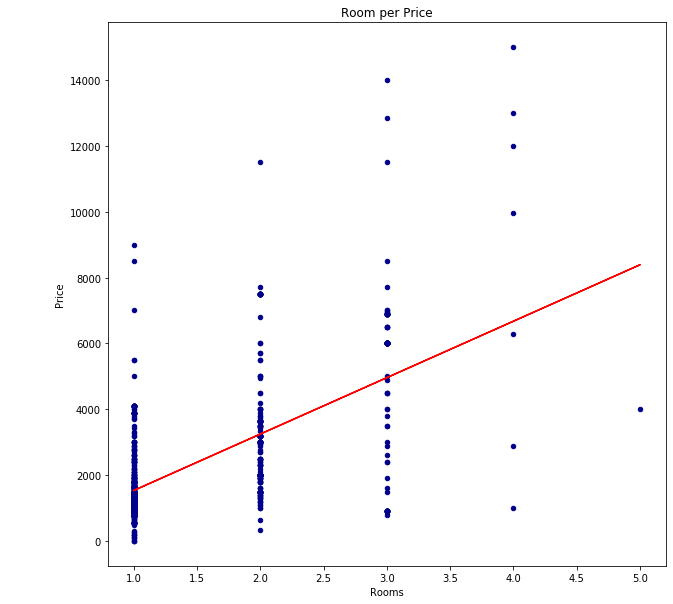

In [174]:
x = df['Size-value'].astype(int)
y = df['Price']    
fit = np.polyfit(x, y, deg=1)

fit

df.plot(kind='scatter', x='Size-value', y='Price', figsize=(10,10), color='darkblue')

plt.title('Room per Price')
plt.xlabel('Rooms')
plt.ylabel('Price')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(0, 0))

plt.show()

In [175]:
geolocator = Nominatim(user_agent="ny_explorer")
xloc = geolocator.geocode(slCity.value)
xlat = xloc.latitude
xlon = xloc.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(slCity.value, xlat, xlon))

geomap = folium.Map(location=[xlat,xlon], zoom_start=12)

# add markers to map
for lat, lng, district, price in zip(df['Latitude'], df['Longitude'],df['Location'], df['Price-value']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=price*3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(geomap)  
    
geomap

The geograpical coordinate of Barcelona, Canada are 41.3828939, 2.1774322.


## Clustering using Scipy

In [176]:
featureset = df[['Rooms',  'Size-value']]

In [177]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.33333333, 0.        ],
       [0.44444444, 0.25      ],
       [0.55555556, 0.5       ],
       [0.11111111, 0.        ],
       [0.11111111, 0.        ]])

In [178]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [180]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
Z = hierarchy.linkage(D, 'complete')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  # Remove the CWD from sys.path while we load stuff.


In [181]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([ 8, 10, 12,  6,  6,  6,  6,  8,  6,  3,  8, 13, 13,  8,  6,  6,  7,
        6,  6,  6, 10,  7,  7, 11,  9,  6,  3,  6,  8,  6,  8,  4,  8,  6,
        6,  6,  8,  6,  6,  6,  8,  6,  6,  6,  9,  6,  8,  8, 10,  8,  7,
        8,  6, 10,  4, 10,  6, 10,  6,  6,  6,  6,  8,  6,  6,  8,  6,  7,
        6,  6, 12,  6, 10,  7,  7,  4,  8,  8,  6,  7,  4,  6, 13,  8,  4,
       10,  8,  8,  7,  8,  6,  6, 11,  4,  8,  6,  7,  6, 12, 12,  8,  6,
        7,  3,  6,  2, 10,  8,  6,  8,  6,  7, 10,  6,  6,  6,  6,  8, 13,
        8,  8,  6,  6,  6,  6,  6,  6,  8, 10,  6,  1,  7, 10, 10, 12,  7,
        6,  8, 10,  7,  8,  6,  8,  6,  6,  6,  6, 10,  6,  8,  6, 10,  6,
        6,  6, 12,  8,  8,  7, 10,  1,  6, 11,  6,  8, 10,  6,  8,  6,  6,
        8,  7,  6,  7,  6,  8,  6,  2,  8,  3,  4,  6,  4,  7,  6,  6,  6,
        6, 10, 10,  6,  6,  6,  8,  4,  7,  7,  6,  7, 10,  7, 10,  8,  4,
        8, 10,  8, 12,  6, 12, 10,  6,  6,  6,  4,  6,  6,  6,  6,  6,  8,
       10,  6,  8,  7,  6

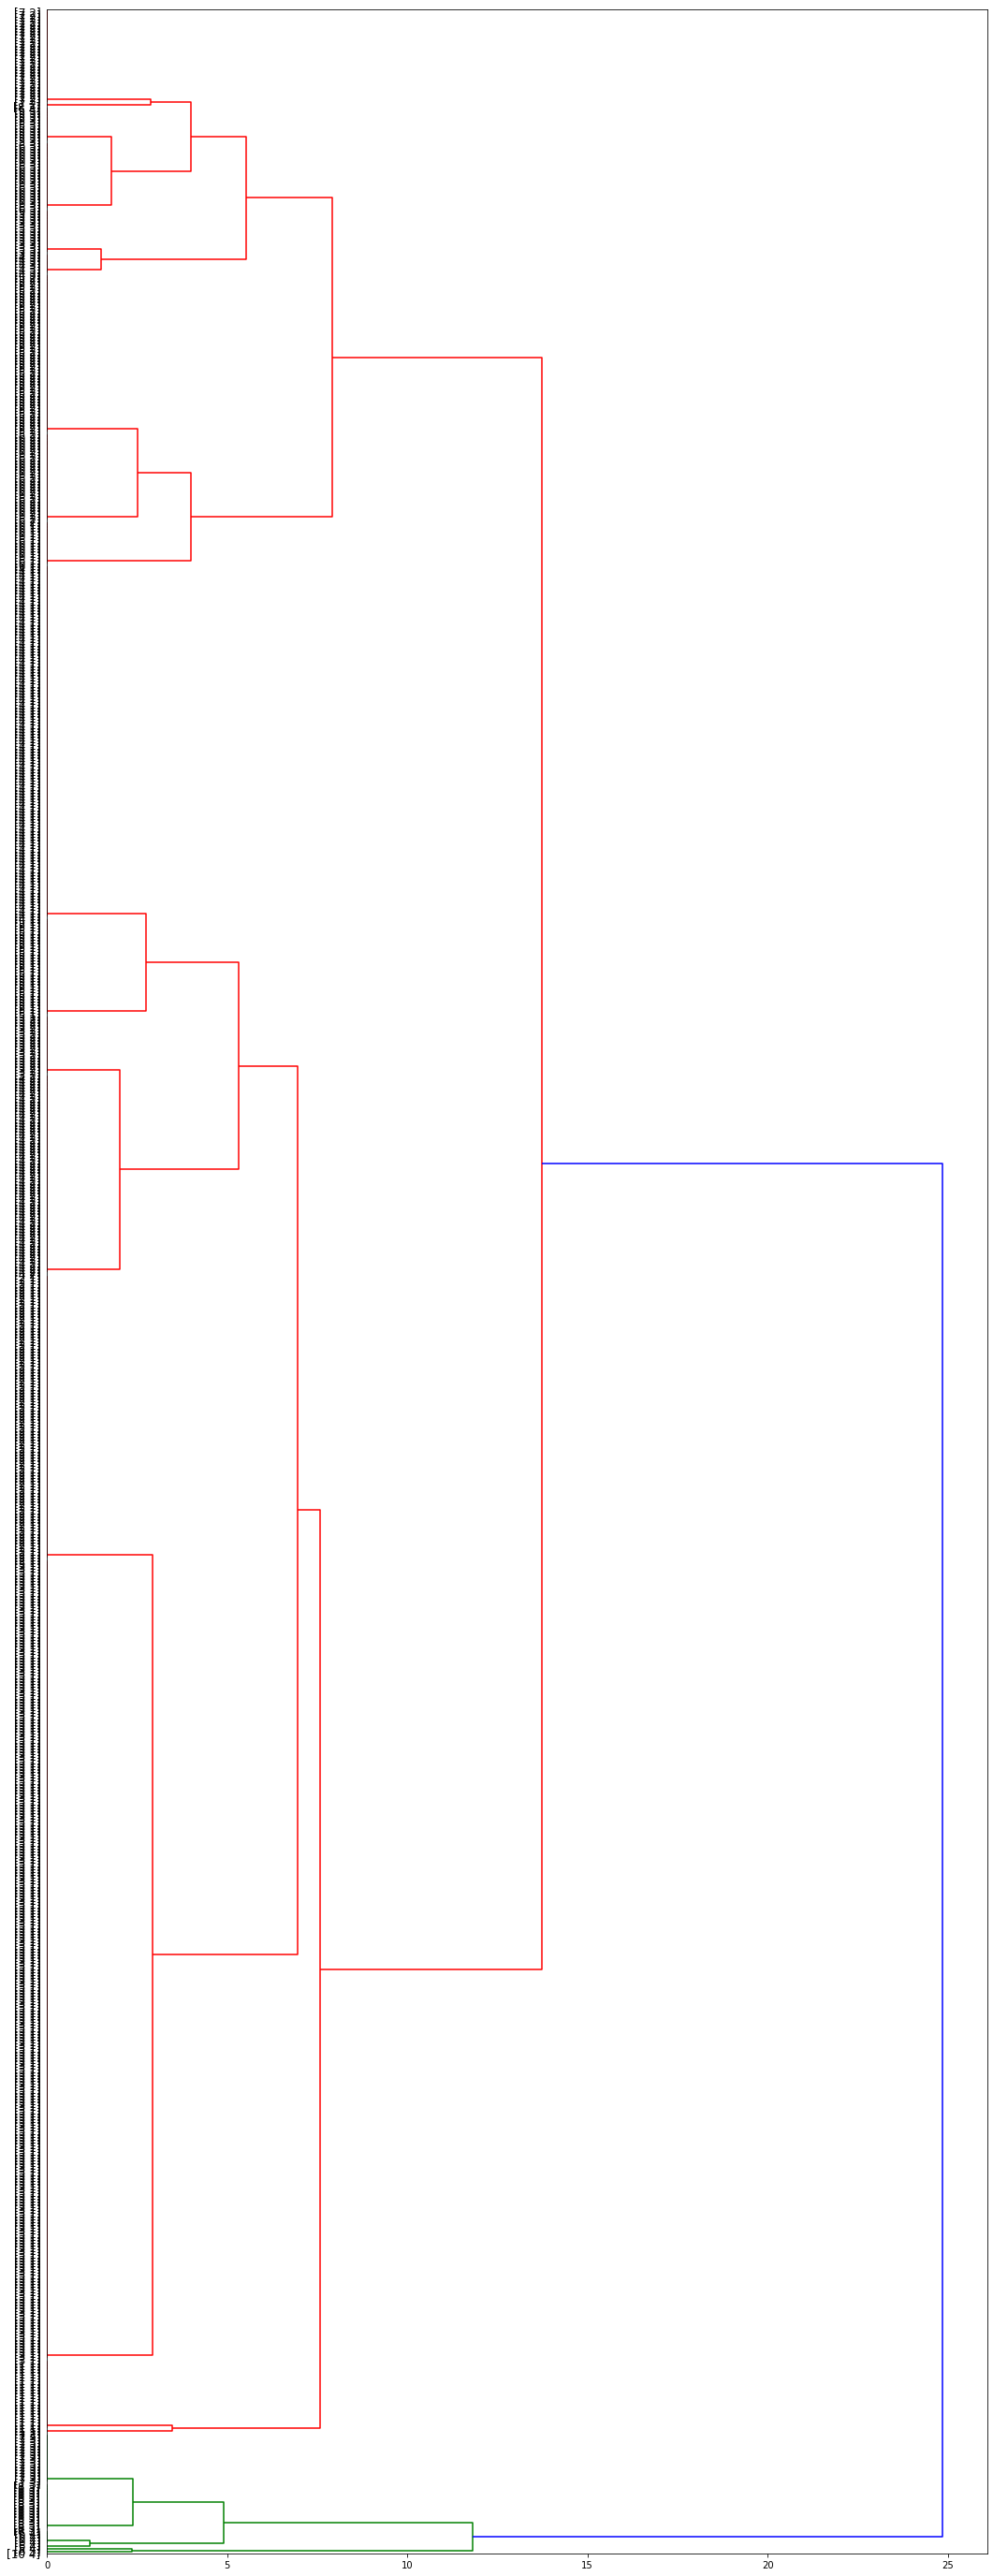

In [185]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s]' % (df['Rooms'][id], df['Size-value'][id])
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

## Clustering using scikit-learn

In [186]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.27357938 0.54715877 ... 0.11111111 0.11111111 0.11111111]
 [0.27357938 0.         0.27357938 ... 0.33448874 0.25       0.33448874]
 [0.54715877 0.27357938 0.         ... 0.60092521 0.51219691 0.60092521]
 ...
 [0.11111111 0.33448874 0.60092521 ... 0.         0.22222222 0.        ]
 [0.11111111 0.25       0.51219691 ... 0.22222222 0.         0.22222222]
 [0.11111111 0.33448874 0.60092521 ... 0.         0.22222222 0.        ]]


In [187]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([0, 2, 2, 1, 1, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       0, 4, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 1, 2, 0, 0,
       0, 0, 1, 0, 4, 1, 0, 0, 0, 1, 2, 2, 0, 0, 0, 2, 0, 3, 2, 0, 0, 0,
       0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 5, 0,
       2, 2, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 2, 0, 0,
       1, 2, 0, 0, 0, 2, 3, 0, 4, 1, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 3, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 1, 1, 0, 2, 1, 4, 2, 2, 1, 2, 2, 1, 0, 0, 2, 1, 4,
       0, 2, 0, 0, 4, 1, 2, 2, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 0,
       0, 2, 3, 4, 0, 0, 1, 2, 2, 0, 0, 0, 2, 2, 0,

In [188]:
df['cluster_'] = agglom.labels_
df.head()

,Location,Size,Rooms,Bathroom,Price,Price mSq,Floor,Longitude,Latitude,Price-binned,Price-value,Rooms-binned,Size-binned,Size-value,cluster_
0,L'Eixample-Torreblanca (Sant Cugat del Vallès),109,4,2,1450,13.0,0,0.0,0.0,Very Low,1,Few,Very Small,1,0
1,Cabrils,338,5,4,3650,10.0,0,0.0,0.0,Low,2,Normal,Small,2,2
2,Alella,500,6,4,6000,12.0,0,0.0,0.0,Low,2,Normal,Avarage,3,2
3,Can Mates-Volpelleres (Sant Cugat del Vallès),76,2,2,1350,17.0,1,0.0,0.0,Very Low,1,Very Few,Very Small,1,1
4,La Pineda (Castelldefels),50,2,1,890,17.0,0,0.0,0.0,Very Low,1,Very Few,Very Small,1,1


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0, 0.5, 'Price')

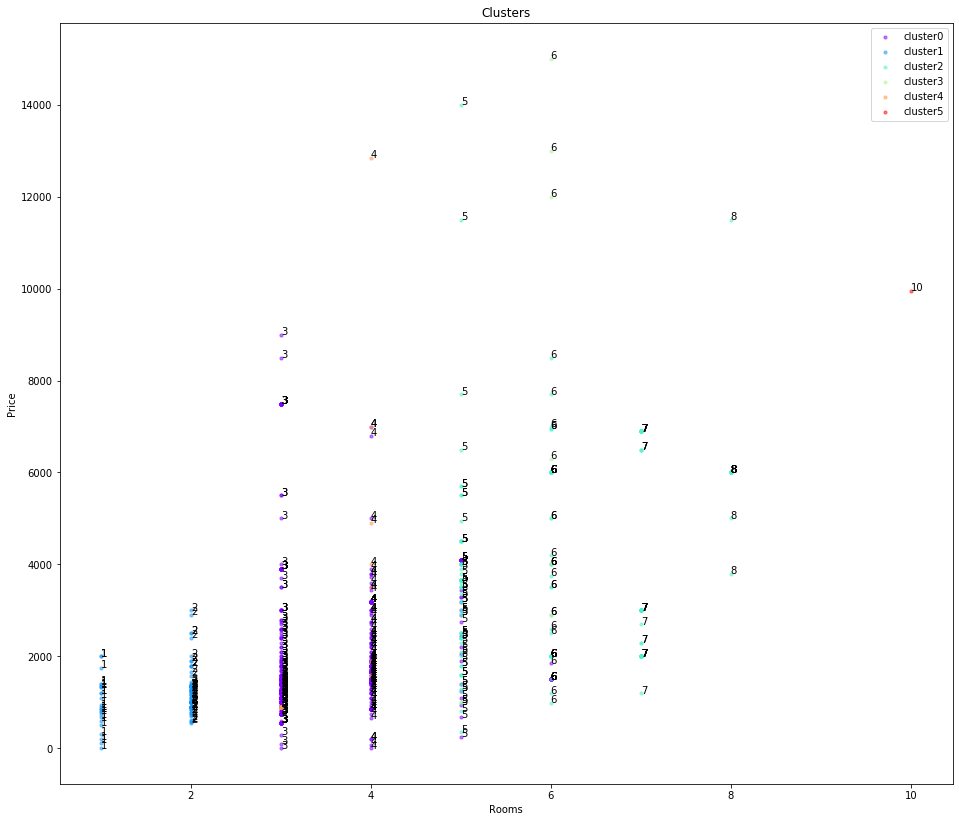

In [206]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    for i in subset.index:
            plt.text(subset.Rooms[i], subset['Price'][i],str(subset['Rooms'][i])) 
    plt.scatter(subset.Rooms, subset['Price'], s= 10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('Rooms')
plt.ylabel('Price')

In [208]:
df.groupby(['cluster_','Rooms'])['cluster_'].count()

cluster_  Rooms
0         3        292
          4        188
          5         33
          6         15
1         1         25
          2         97
2         5         66
          6         53
          7         49
          8         17
3         5          1
          6          6
4         3         15
          4          7
5         10         1
Name: cluster_, dtype: int64

In [210]:
agg_cars = df.groupby(['cluster_','Price-value'])['Size','Rooms'].mean()
agg_cars

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Size      Rooms
cluster_ Price-value                        
0        1             151.932432   3.522523
         2             183.454545   3.984848
         3             339.555556   3.111111
         4                    NaN        NaN
         5                    NaN        NaN
1        1              73.754098   1.795082
         2                    NaN        NaN
         3                    NaN        NaN
         4                    NaN        NaN
         5                    NaN        NaN
2        1             363.379747   6.088608
         2             436.873418   5.936709
         3             587.000000   6.625000
         4             440.000000   6.500000
         5             591.000000   5.000000
3        1             769.500000   5.500000
         2            1135.000000   6.000000
         3             720.000000   6.000000
         4             750.000000   6.000000
         5             825.000000   6.000000
4        1             565.000000   3.117647
         2             507.666667   4.000000
         3             625.000000   4.000000
         4                    NaN        NaN
         5             600.000000   4.000000
5        1                    NaN        NaN
         2                    NaN        NaN
         3                    NaN        NaN
         4             764.000000  10.000000
         5                    NaN        NaN

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0, 0.5, 'Rooms')

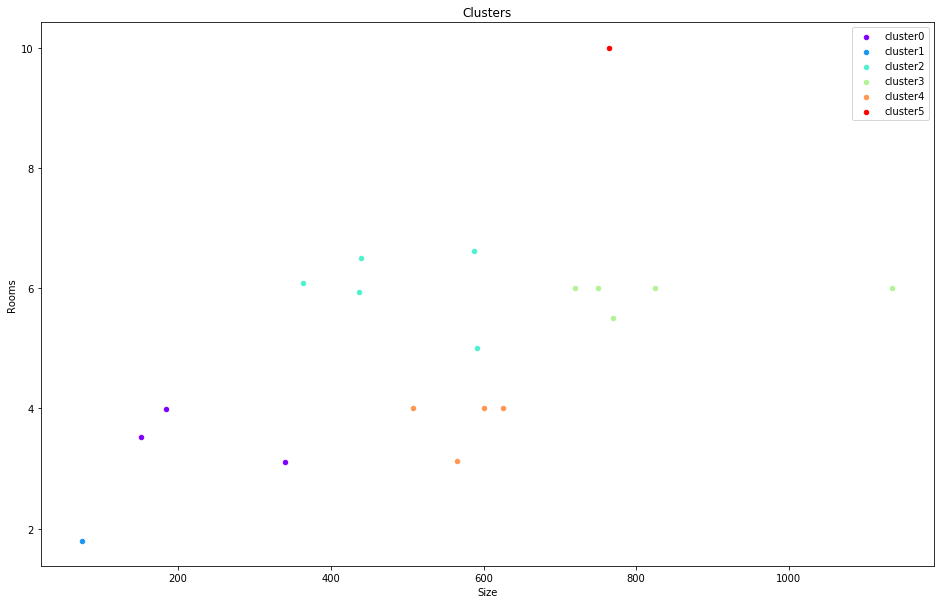

In [233]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    #for i in subset.index:
        #plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.Size, subset.Rooms, s=20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('Size')
plt.ylabel('Rooms')


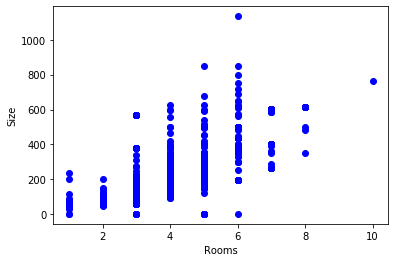

In [251]:
plt.scatter(df['Rooms'], df['Size'],  color='blue')
plt.xlabel("Rooms")
plt.ylabel("Size")
plt.show()

In [265]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(df['Size'])
train_y = np.asanyarray(df['Price'])
regr.fit (train_x.reshape(-1, 1), train_y.reshape(-1, 1))
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[7.47232639]]
Intercept:  [688.15544605]


Text(0.5, 0, 'Size')

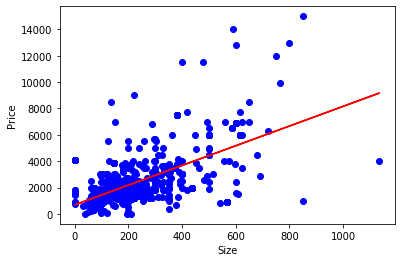

In [267]:
plt.scatter(df['Size'], df['Price'],  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.ylabel("Price")
plt.xlabel("Size")

In [268]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(df[['Price']])
test_y = np.asanyarray(df[['Size']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 18025.09
Residual sum of squares (MSE): 541122271.54
R2-score: -1.47


Linear relationship between Size and the Price


(0, 15750.016694260485)

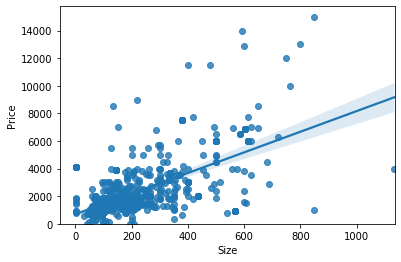

In [269]:
print('Linear relationship between Size and the Price')
# Engine size as potential predictor variable of price
sns.regplot(x="Size", y="Price", data=df)
plt.ylim(0,)